In this file, we analyse the effect of change the Im part of FFT, we want to explore whether the Im part will not change if adding some noise into a image.

In [1]:
import sys
sys.path.append('../')

import PIL.Image
import numpy as np
from tools.img import fft_2d_3c, ifft_2d_3c
from tools.img import rgb2yuv, yuv2rgb
import matplotlib.pyplot as plt
import random

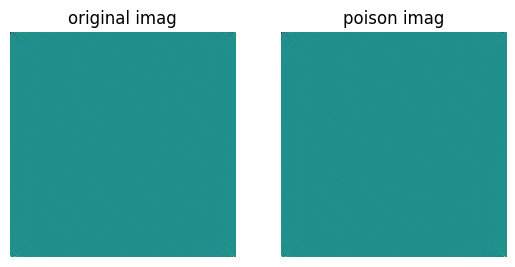

-0.001735674680444232

In [2]:
scale = 224
wind = 2
start = random.randint(0, scale - wind)
x_img = PIL.Image.open('../resource/example/000001.jpg')
x_img = x_img.resize((scale, scale))
x = np.array(x_img)
x_fft = fft_2d_3c(rgb2yuv(x))
x_real, x_imag = x_fft.real, x_fft.imag
x_imag_poison = x_imag.copy()
x_imag_poison[start:(start + wind), start:(start + wind), 1] = 0

_, ax = plt.subplots(1, 2)
ax[0].imshow(x_imag[:, :, 1])
ax[0].set_title('original imag')
ax[0].axis('off')

ax[1].imshow(x_imag_poison[:, :, 1])
ax[1].set_title('poison imag')
ax[1].axis('off')

plt.show()
(x_imag_poison - x_imag).mean()

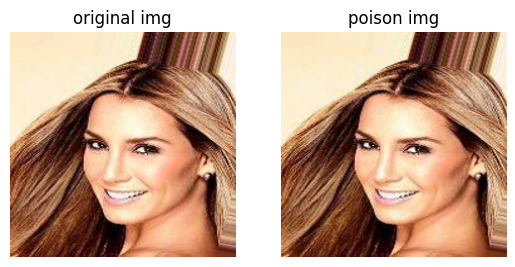

In [3]:
x_fft = x_real + 1j * x_imag_poison
x_poison = yuv2rgb(ifft_2d_3c(x_fft).real).astype(int)
_, ax = plt.subplots(1, 2)
ax[0].imshow(x)
ax[0].set_title('original img')
ax[0].axis('off')

ax[1].imshow(x_poison)
ax[1].set_title('poison img')
ax[1].axis('off')

plt.show()

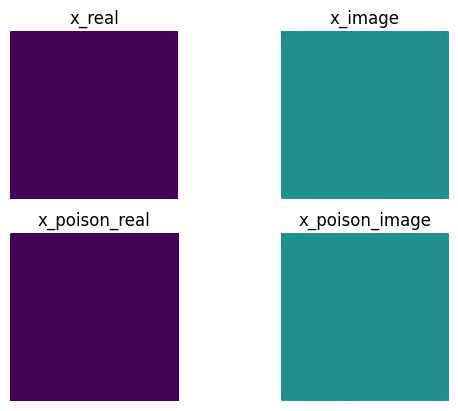

In [4]:
x_fft = fft_2d_3c(rgb2yuv(x))
x_fft_poison = fft_2d_3c(rgb2yuv(x_poison))
x_real, x_imag = x_fft.real, x_fft.imag
x_poison_real, x_poison_image = x_fft_poison.real, x_fft_poison.imag
_, ax = plt.subplots(2, 2)
ax[0][0].imshow(x_real[:, :, 1])
ax[0][0].set_title('x_real')
ax[0][0].axis('off')

ax[0][1].imshow(x_imag[:, :, 1])
ax[0][1].set_title('x_image')
ax[0][1].axis('off')

ax[1][0].imshow(x_poison_real[:, :, 1])
ax[1][0].set_title('x_poison_real')
ax[1][0].axis('off')

ax[1][1].imshow(x_poison_image[:, :, 1])
ax[1][1].set_title('x_poison_image')
ax[1][1].axis('off')

plt.show()

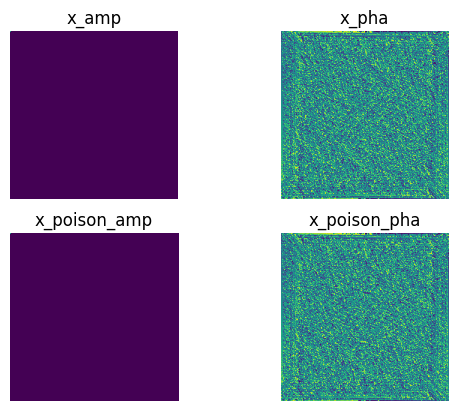

In [5]:
x_amp, x_pha = np.abs(x_fft), np.angle(x_fft)
x_poison_amp, x_poison_pha = np.abs(x_fft_poison), np.angle(x_fft_poison)

_, ax = plt.subplots(2, 2)
ax[0][0].imshow(x_amp[:, :, 1].astype(int))
ax[0][0].set_title('x_amp')
ax[0][0].axis('off')

ax[0][1].imshow(x_pha[:, :, 1].astype(float))
ax[0][1].set_title('x_pha')
ax[0][1].axis('off')

ax[1][0].imshow(x_poison_amp[:, :, 1].astype(int))
ax[1][0].set_title('x_poison_amp')
ax[1][0].axis('off')

ax[1][1].imshow(x_poison_pha[:, :, 1].astype(float))
ax[1][1].set_title('x_poison_pha')
ax[1][1].axis('off')

plt.show()